In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib

In [2]:
import glob

In [3]:
path2data = "/media/gagan/Extreme SSD/zudeep/models/daily_gan/p20r16_nz12_alldaysnets/pitch_gap_duration_distributions/"

In [5]:
files = glob.glob(os.path.join(path2data, "*.pkl"))

# Load each pickle file and plot

In [6]:
pitch_distances = []
duration_distances = []
gap_distances = []

for file in files:
    
    data = joblib.load(file)
    pitch_distances.append(data["pitch_distance"])
    duration_distances.append(data["duration_distance"])
    gap_distances.append(data["gap_distance"])

In [18]:
data.keys()

dict_keys(['pitches_real', 'durations_real', 'gap_lengths_real', 'pitches_samp', 'durations_samp', 'gap_lengths_samp', 'pitch_distance', 'gap_distance', 'duration_distance'])

In [19]:
type(data["pitches_real"])

numpy.ndarray

In [20]:
data["pitches_real"].shape

(117531,)

In [7]:
pitch_distances = np.array(pitch_distances)
pitch_distances.shape

(28,)

In [8]:
duration_distances = np.array(duration_distances)
duration_distances.shape

(28,)

In [9]:
gap_distances = np.array(gap_distances)
gap_distances.shape

(28,)

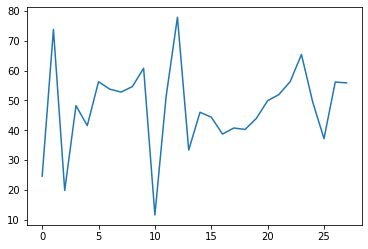

In [10]:
plt.plot(pitch_distances)

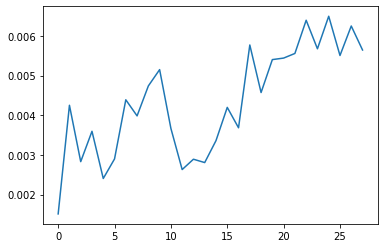

In [11]:
plt.plot(duration_distances)

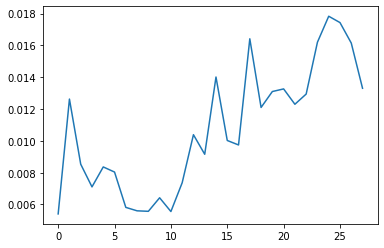

In [12]:
plt.plot(gap_distances)

In [13]:
files[0]

'/media/gagan/Extreme SSD/zudeep/models/daily_gan/p20r16_nz12_alldaysnets/pitch_gap_duration_distributions/pitch_durations_gaps_day_5_hiddensize_100.pkl'

In [15]:
os.path.basename(files[0]).index("day")

21

In [17]:
os.path.basename(files[0])[25]

'5'

# Pool data from day 5 - 10 as early 10-15 as middle and 15-20 as late

In [25]:
def extract_data(path2data, feature = "pitches", thresholds = [0, 10, 20]):
    
    files = glob.glob(os.path.join(path2data, "*.pkl"))
    
    early_days_real = []
    early_days_samp = []
    mid_days_real = []
    mid_days_samp = []
    late_days_real = []
    late_days_samp = []
    
    for file in files:
        # get day
        fname = os.path.basename(file)
        # find index of day
        d = fname.index("day")
        d1 = fname[d + 4]
        if fname[d + 5] != "_":
            d1 = d1 + fname[d + 5]
        day = int(d1)

        data = joblib.load(file)
        if thresholds[0] <= day < thresholds[1]:
            early_days_real.append(data[feature + "_real"])
            early_days_samp.append(data[feature + "_samp"])
            
        elif thresholds[1] <= day < thresholds[2]:
            mid_days_real.append(data[feature + "_real"])
            mid_days_samp.append(data[feature + "_samp"])
            
        elif thresholds[2] <= day:
            late_days_real.append(data[feature + "_real"])
            late_days_samp.append(data[feature + "_samp"])
        
    early_days_real = np.concatenate(early_days_real)
    early_days_samp = np.concatenate(early_days_samp)
    mid_days_real = np.concatenate(mid_days_real)
    mid_days_samp = np.concatenate(mid_days_samp)
    late_days_real = np.concatenate(late_days_real)
    late_days_samp = np.concatenate(late_days_samp)
    
    return early_days_real, early_days_samp, mid_days_real, mid_days_samp, late_days_real, late_days_samp
        

In [26]:
early_pitch_real, early_pitch_samp, mid_pitch_real, mid_pitch_samp, \
late_pitch_real, late_pitch_samp = extract_data(path2data, "pitches")

In [129]:
early_pitch_samp.shape

(638764,)

In [29]:
mid_pitch_real.shape

(1752364,)

In [30]:
mid_pitch_samp.shape

(1742922,)

In [40]:
early_dur_real, early_dur_samp, mid_dur_real, mid_dur_samp, \
late_dur_real, late_dur_samp = extract_data(path2data, "durations")

In [42]:
early_gaps_real, early_gaps_samp, mid_gaps_real, mid_gaps_samp, \
late_gaps_real, late_gaps_samp = extract_data(path2data, "gap_lengths")

# Remove outliers

In [37]:
from sklearn.covariance import EllipticEnvelope

In [132]:
def remove_outliers(arr, contamination = 0.1):
    ep = EllipticEnvelope(contamination=contamination)
    outliers = ep.fit_predict(arr.reshape(-1, 1))
    arr = arr[outliers==1]
    return arr

def shuffle_and_truncate(arr, max_samples: int):
    np.random.shuffle(arr)
    return arr[:max_samples]

In [ ]:
def extract_bins_from_range(arr1, arr2, nbins = 20):
    min1, max1 = np.min(arr1), np.max(arr1)
    min2, max2 = np.min(arr2), np.max(arr2)
    minn = min(min1, min2)
    maxx = max(max1, max2)
    return np.linspace(minn, maxx, nbins)

In [164]:
CONTAM = 0.05

In [165]:
e_p_r = remove_outliers(early_pitch_real, contamination=CONTAM)
e_p_s = remove_outliers(early_pitch_samp, contamination=CONTAM)
nsamp = min(len(e_p_r), len(e_p_s))
e_p_r = shuffle_and_truncate(e_p_r, nsamp)
e_p_s = shuffle_and_truncate(e_p_s, nsamp)

e_d_r = remove_outliers(early_dur_real, contamination=CONTAM)
e_d_s = remove_outliers(early_dur_samp, contamination=CONTAM)
nsamp = min(len(e_d_r), len(e_d_s))
e_d_r = shuffle_and_truncate(e_d_r, nsamp)
e_d_s = shuffle_and_truncate(e_d_s, nsamp)

e_g_r = remove_outliers(early_gaps_real, contamination=CONTAM)
e_g_s = remove_outliers(early_gaps_samp, contamination=CONTAM)
nsamp = min(len(e_g_r), len(e_g_s))
e_g_r = shuffle_and_truncate(e_g_r, nsamp)
e_g_s = shuffle_and_truncate(e_g_s, nsamp)

In [166]:
m_p_r = remove_outliers(mid_pitch_real, contamination=CONTAM)
n_p_s = remove_outliers(mid_pitch_samp, contamination=CONTAM)
nsamp = min(len(m_p_r), len(m_p_s))
m_p_r = shuffle_and_truncate(m_p_r, nsamp)
m_p_s = shuffle_and_truncate(m_p_s, nsamp)

m_d_r = remove_outliers(mid_dur_real, contamination=CONTAM)
m_d_s = remove_outliers(mid_dur_samp, contamination=CONTAM)
nsamp = min(len(m_d_r), len(m_d_s))
m_d_r = shuffle_and_truncate(m_d_r, nsamp)
m_d_s = shuffle_and_truncate(m_d_s, nsamp)

m_g_r = remove_outliers(mid_gaps_real, contamination=CONTAM)
m_g_s = remove_outliers(mid_gaps_samp, contamination=CONTAM)
nsamp = min(len(m_g_r), len(m_g_s))
m_g_r = shuffle_and_truncate(m_g_r, nsamp)
m_g_s = shuffle_and_truncate(m_g_s, nsamp)

In [167]:
l_p_r = remove_outliers(late_pitch_real, contamination=CONTAM)
l_p_s = remove_outliers(late_pitch_samp, contamination=CONTAM)
nsamp = min(len(l_p_r), len(l_p_s))
l_p_r = shuffle_and_truncate(l_p_r, nsamp)
l_p_s = shuffle_and_truncate(l_p_s, nsamp)

l_d_r = remove_outliers(late_dur_real, contamination=CONTAM)
l_d_s = remove_outliers(late_dur_samp, contamination=CONTAM)
nsamp = min(len(l_d_r), len(l_d_s))
l_d_r = shuffle_and_truncate(l_d_r, nsamp)
l_d_s = shuffle_and_truncate(l_d_s, nsamp)

l_g_r = remove_outliers(late_gaps_real, contamination=CONTAM)
l_g_s = remove_outliers(late_gaps_samp, contamination=CONTAM)
nsamp = min(len(l_g_r), len(l_g_s))
l_g_r = shuffle_and_truncate(l_g_r, nsamp)
l_g_s = shuffle_and_truncate(l_g_s, nsamp)

In [205]:
os.makedirs?

Signature: os.makedirs(name, mode=511, exist_ok=False)
Docstring:
makedirs(name [, mode=0o777][, exist_ok=False])

Super-mkdir; create a leaf directory and all intermediate ones.  Works like
mkdir, except that any intermediate path segment (not just the rightmost)
will be created if it does not exist. If the target directory already
exists, raise an OSError if exist_ok is False. Otherwise no exception is
raised.  This is recursive.
File:      ~/anaconda3/envs/earkick/lib/python3.8/os.py
Type:      function


# Plot pitch histograms

In [168]:
nbins = 100

In [169]:
pbins = extract_bins_from_range(e_p_r, e_p_s, 100)

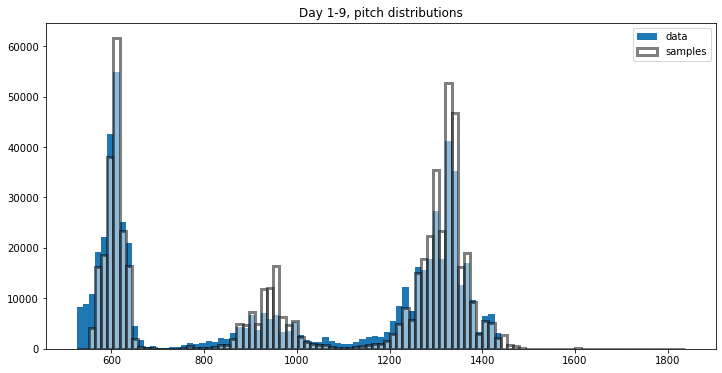

In [170]:
plt.figure(figsize=(12,6))
plt.hist(e_p_r, pbins, )
plt.hist(e_p_s, pbins, alpha=0.5, lw=3, color='w', ec='k')
#plt.xlim([500, 1500])
plt.title("Day 1-9, pitch distributions")
plt.legend(["data", "samples"])
plt.show()

In [171]:
pbins = extract_bins_from_range(m_p_r, m_p_s, 100)

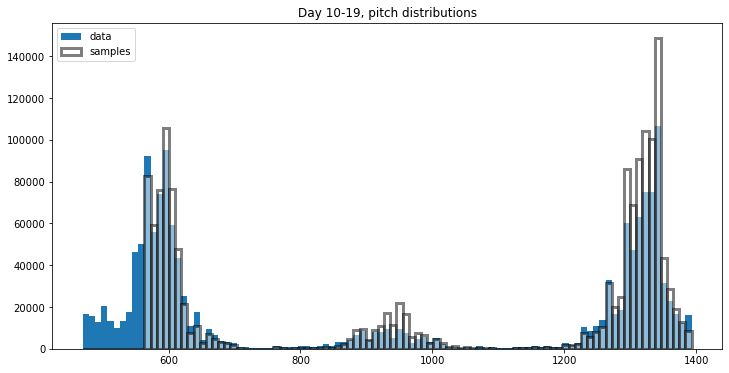

In [172]:
plt.figure(figsize=(12,6))
plt.hist(m_p_r, pbins, )
plt.hist(m_p_s, pbins, alpha=0.5, lw=3, color='w', ec='k')
#plt.xlim([500, 1500])
plt.title("Day 10-19, pitch distributions")
plt.legend(["data", "samples"])
plt.show()

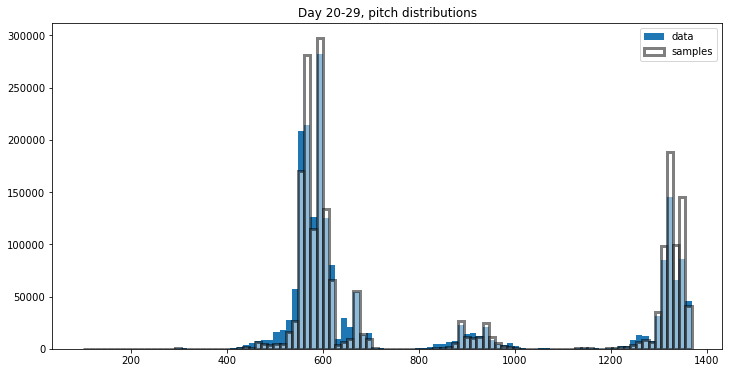

In [174]:
pbins = extract_bins_from_range(l_p_r, l_p_s, 100)

plt.figure(figsize=(12,6))
plt.hist(l_p_r, pbins, )
plt.hist(l_p_s, pbins, alpha=0.5, lw=3, color='w', ec='k')
#plt.xlim([500, 1500])
plt.title("Day 20-29, pitch distributions")
plt.legend(["data", "samples"])
plt.show()

# Plot duration

In [184]:
nbins = 50

In [188]:
from scipy.stats import energy_distance, wasserstein_distance

In [191]:
print(energy_distance(e_d_r, e_d_s),
      energy_distance(m_d_r, m_d_s),
      energy_distance(l_d_r, l_d_s))

0.011303473477196038 0.015035970072743586 0.02140450952217592


In [192]:
print(wasserstein_distance(e_d_r, e_d_s),
      wasserstein_distance(m_d_r, m_d_s),
      wasserstein_distance(l_d_r, l_d_s))

0.002367223223850956 0.0034283104454063277 0.004758965047662281


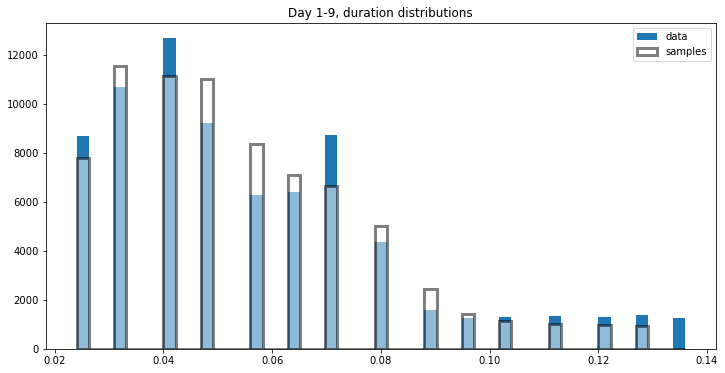

In [185]:
dbins = extract_bins_from_range(e_d_r, e_d_s, nbins = nbins)

plt.figure(figsize=(12,6))
plt.hist(e_d_r, dbins)
plt.hist(e_d_s, dbins, alpha=0.5, ec="k", color='w', lw=3)
#plt.xlim([400, 1400])
plt.title("Day 1-9, duration distributions")
plt.legend(["data", "samples"])
plt.show()
plt.

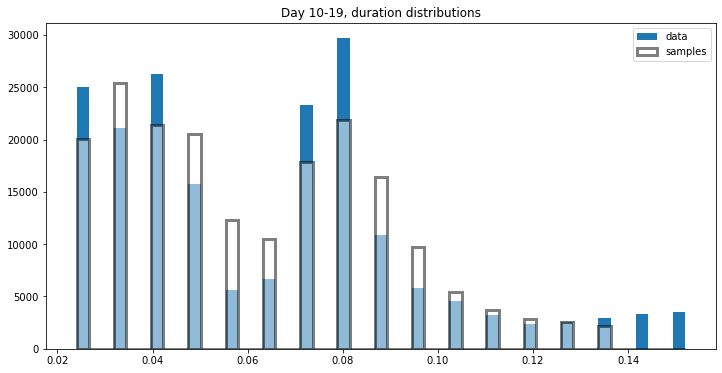

In [186]:
dbins = extract_bins_from_range(m_d_r, m_d_s, nbins = nbins)

plt.figure(figsize=(12,6))
plt.hist(m_d_r, dbins)
plt.hist(m_d_s, dbins, alpha=0.5, ec="k", color='w', lw=3)
#plt.xlim([400, 1400])
plt.title("Day 10-19, duration distributions")
plt.legend(["data", "samples"])
plt.show()

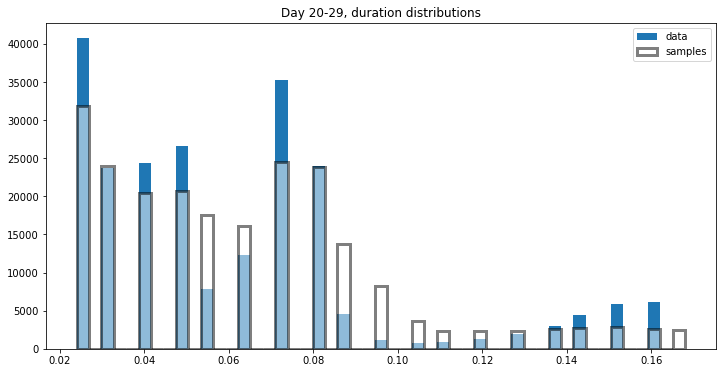

In [187]:
dbins = extract_bins_from_range(l_d_r, l_d_s, nbins = nbins)

plt.figure(figsize=(12,6))
plt.hist(l_d_r, dbins)
plt.hist(l_d_s, dbins, alpha=0.5, ec="k", color='w', lw=3)
#plt.xlim([400, 1400])
plt.title("Day 20-29, duration distributions")
plt.legend(["data", "samples"])
plt.show()

# Plot gaps

In [ ]:
nbins = 50

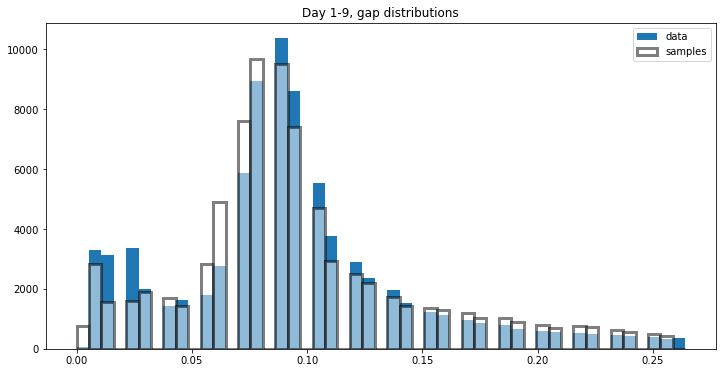

In [197]:
gbins = extract_bins_from_range(e_g_r, e_g_s, nbins = nbins)

plt.figure(figsize=(12,6))
plt.hist(e_g_r, gbins)
plt.hist(e_g_s, gbins, alpha=0.5, ec="k", color='w', lw=3)
#plt.xlim([400, 1400])
plt.title("Day 1-9, gap distributions")
plt.legend(["data", "samples"])
plt.show()

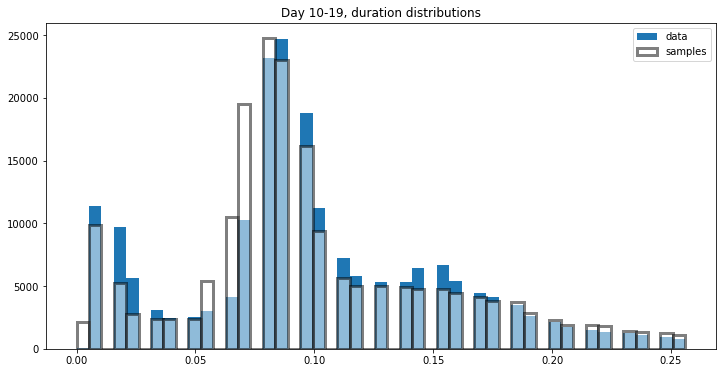

In [203]:
gbins = extract_bins_from_range(m_g_r, m_g_s, nbins = nbins)

plt.figure(figsize=(12,6))
plt.hist(m_g_r, gbins)
plt.hist(m_g_s, gbins, alpha=0.5, ec="k", color='w', lw=3)
#plt.xlim([400, 1400])
plt.title("Day 10-19, duration distributions")
plt.legend(["data", "samples"])
plt.show()

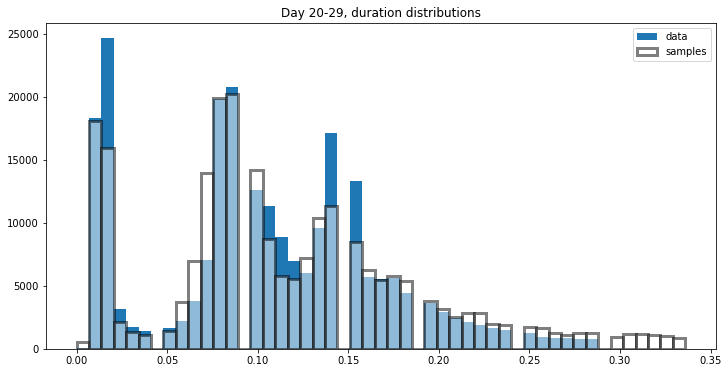

In [202]:
gbins = extract_bins_from_range(l_g_r, l_g_s, nbins = nbins)

plt.figure(figsize=(12,6))
plt.hist(l_g_r, gbins)
plt.hist(l_g_s, gbins, alpha=0.5, ec="k", color='w', lw=3)
#plt.xlim([400, 1400])
plt.title("Day 20-29, duration distributions")
plt.legend(["data", "samples"])
plt.show()

In [201]:
print(wasserstein_distance(e_g_r, e_g_s),
      wasserstein_distance(m_g_r, m_g_s),
      wasserstein_distance(l_g_r, l_g_s))

0.004320834514987483 0.005003462691395844 0.009990901224307952


# Make and save plots

In [ ]:
def make_and_save_plots(early_real, early_sample, mid_real, mid_sample,
                        late_real, late_sample, feature="pitch"):
    
    